In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Параметры
n = 20  # Размер сетки n x n
proportion_bleu = 0.45
proportion_rouge = 0.45
proportion_vide = 0.10

In [8]:
# Инициализация сетки
def generer_grille(n, p_bleu, p_rouge, p_vide):
    total_cells = n * n
    nb_bleu = int(total_cells * p_bleu)
    nb_rouge = int(total_cells * p_rouge)
    nb_vide = total_cells - (nb_bleu + nb_rouge)
    
    # Создать список ячеек
    cells = [1] * nb_bleu + [2] * nb_rouge + [0] * nb_vide  # 1=синий, 2=Красный, 0=пустой
    np.random.shuffle(cells)  # Перемешать ячейки
    
    # Преобразовать в сетку
    grille = np.array(cells).reshape((n, n))
    return grille

grille_initiale = generer_grille(n, proportion_bleu, proportion_rouge, proportion_vide)

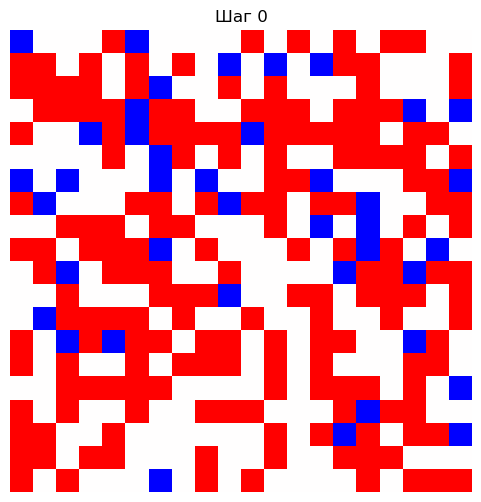

In [12]:
# Отображение начальной сетки
def afficher_grille(grille, step=0):
    plt.figure(figsize=(6, 6))
    plt.imshow(grille, cmap="bwr", interpolation="nearest")
    plt.title(f"Шаг {step}")
    plt.axis("off")
    plt.show()

afficher_grille(grille_initiale, step=0)

In [14]:
# Вот начальная сетка, где :
    # Красные клетки представляют группу (красную),
    # Синие ячейки представляют другую группу (синие),
    # Белые (пустые) ячейки - это свободные места.

# Следующим шагом является реализация правила счастья и моделирование перемещения "несчастных" ячеек.

In [16]:
# Функция для определения того, счастлива ли ячейка
def est_heureux(grille, x, y):
    couleur = grille[x, y]
    if couleur == 0:  # Пустые ячейки нейтральны
        return True

    # Проверить соседей в радиусе 1 ячейки
    voisins = grille[max(0, x-1):min(n, x+2), max(0, y-1):min(n, y+2)]
    voisins = voisins[voisins != 0]  # Игнорировать пустые ячейки
    meme_couleur = np.sum(voisins == couleur)
    
    return meme_couleur >= 2  # Счастлив, если хотя бы 2 соседа одного цвета

In [18]:
# Моделирование одного этапа
def simulation_step(grille):
    malheureux = []

    # Выявление несчастных клеток
    for x in range(n):
        for y in range(n):
            if grille[x, y] != 0 and not est_heureux(grille, x, y):
                malheureux.append((x, y))
    
    if not malheureux:  # Если все счастливы, прекрати
        return grille, False

    # Переместить несчастливую ячейку случайным образом
    x, y = malheureux[np.random.randint(len(malheureux))]
    cellules_vides = np.argwhere(grille == 0)
    nouvelle_position = cellules_vides[np.random.randint(len(cellules_vides))]
    
    # Выполнить перемещение
    grille[nouvelle_position[0], nouvelle_position[1]] = grille[x, y]
    grille[x, y] = 0

    return grille, True

In [20]:
# Многоступенчатое моделирование
def simulation(grille, max_steps=50):
    step = 0
    while step < max_steps:
        grille, changed = simulation_step(grille)
        afficher_grille(grille, step=step+1)
        if not changed:  # Остановить, если больше нет изменений
            break
        step += 1

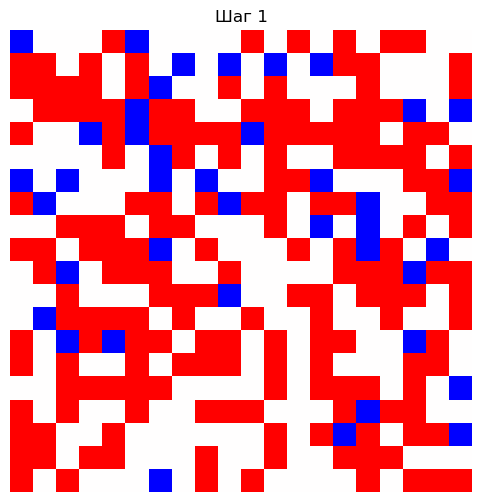

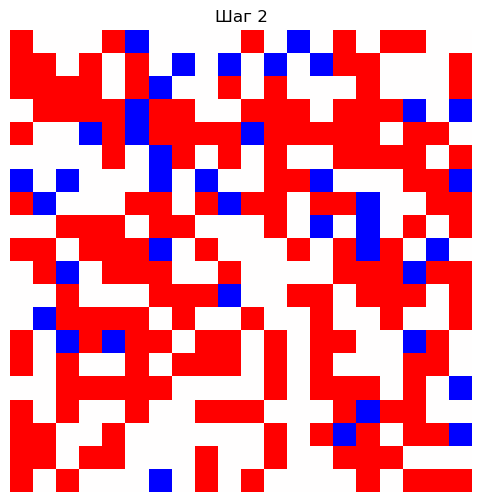

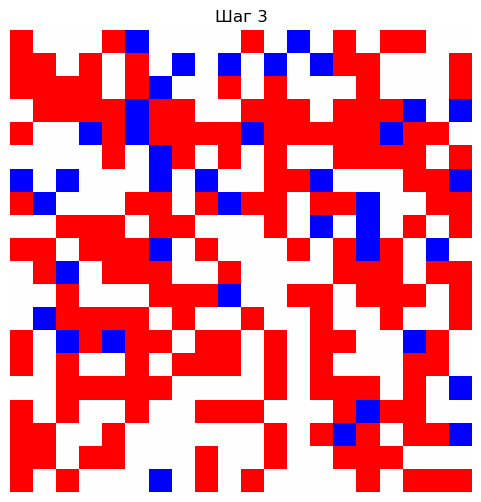

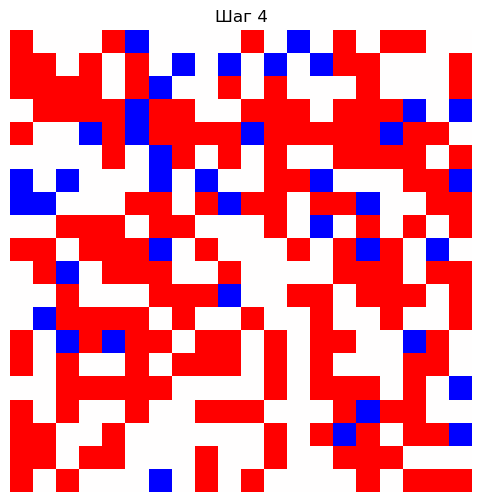

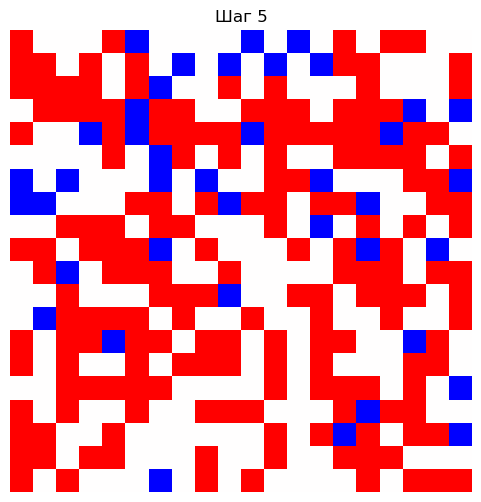

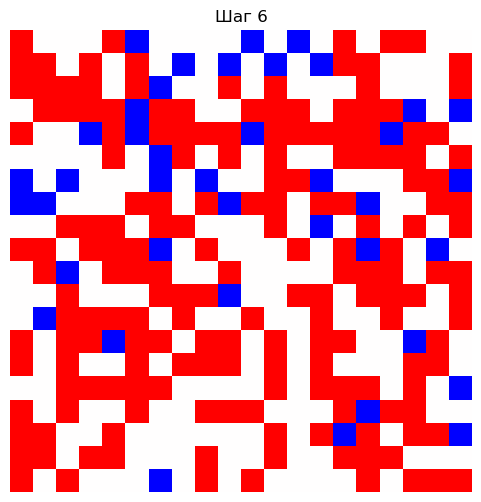

In [22]:
# Запустить симуляцию
simulation(grille_initiale)

In [ ]:
# Моделирование иллюстрирует прогрессирование сегрегации. На каждом этапе :
    # "Несчастливые" клетки перемещаются в пустые места.
    # Сегрегация постепенно становится заметной, образуются однородные области.